In [155]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_predict


%matplotlib inline

## Exercise 1 (1 point)

In [12]:
muon_data = pd.read_csv("mc-chic1.csv",index_col=0)

In [19]:
muon_data

,ep,eta,p,phi,pol,pt,qp,tx,ty,zV
0,0.005459,3.210803,72.079880,0.294754,1.0,5.803692,72.079880,0.077296,0.023467,-60.3975
1,0.004050,4.436362,37.638340,-0.088796,1.0,0.891071,-37.638340,0.023588,-0.002100,-60.3975
2,0.003901,3.577396,18.565832,0.319936,1.0,1.036960,18.565832,0.053102,0.017594,-60.3975
3,0.003859,3.532860,8.632520,0.219504,1.0,0.504075,-8.632520,0.057089,0.012736,-60.3975
4,0.004975,3.300828,43.359665,-0.720869,1.0,3.191501,43.359665,0.055445,-0.048714,-8.0373
...,...,...,...,...,...,...,...,...,...,...
208979,0.007196,4.140301,7.805385,0.284841,-1.0,0.248430,-7.805385,0.030561,0.008948,-10.3122
208980,0.007210,3.852298,160.216980,2.341455,-1.0,6.800037,160.216980,-0.029593,0.030478,-47.0282
208981,0.004592,4.234431,32.691210,1.112678,-1.0,0.947065,-32.691210,0.012818,0.025994,-47.0282
208982,0.003816,4.122482,14.349394,2.564155,-1.0,0.464920,14.349394,-0.027161,0.017696,-47.0282


In [15]:
muon_data.isnull().sum()

ep     0
eta    0
p      0
phi    0
pol    0
pt     0
qp     0
tx     0
ty     0
zV     0
dtype: int64

In [16]:
muon_data.isna().sum()

ep     0
eta    0
p      0
phi    0
pol    0
pt     0
qp     0
tx     0
ty     0
zV     0
dtype: int64

No null or na values for any of the entries.

This also means all variables have same number of entries.

In [36]:
# Momentum and momentum resolution
momentum = muon_data.p.values
mom_res = muon_data.ep.values

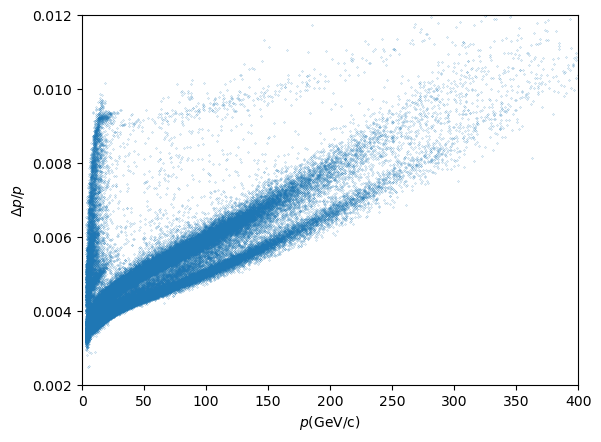

In [48]:
plt.scatter(x=momentum,y=mom_res,marker=".",s=0.1)
plt.xlim([0,400])
plt.ylim([0.002,.012])
plt.ylabel("$\Delta p / p$")
plt.xlabel("$p(\mathrm{GeV} / \mathrm{c})$")
plt.show()

## Exercise 2 (1 point)

### Plot the 1D distributions for p and pT in log scale.

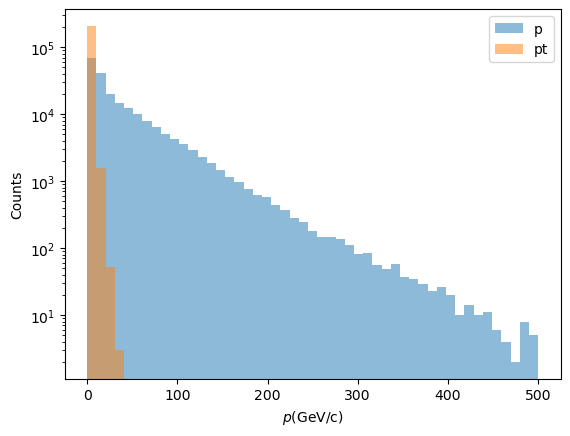

In [67]:
plt.hist(muon_data.p,bins=np.linspace(0,500,50),alpha=0.5,label="p")
plt.hist(muon_data.pt,bins=np.linspace(0,500,50),alpha=0.5,label="pt")
plt.yscale("log")
plt.ylabel("Counts")
plt.xlabel("$p(\mathrm{GeV} / \mathrm{c})$")
plt.legend()
plt.show()

We can see that the size of pt is much smaller than the size of p

Therefore, difference between p and pz is negligable

Therefore, pt << pz also

### Create the $\sigma_{p_z} /p_{z}$ vs. $p_z$ scatter plot and demonstrate that it is qualitatively identical to Fig. 1

In [80]:
pz = np.sqrt(np.square(muon_data.p)-np.square(muon_data.pt))

In [81]:
epz = muon_data.ep*(muon_data.p/pz)

In [88]:
muon_data_ext = pd.concat([muon_data,pz.rename("pz"),epz.rename("epz")],axis=1)

In [89]:
muon_data_ext

,ep,eta,p,phi,pol,pt,qp,tx,ty,zV,pz,epz
0,0.005459,3.210803,72.079880,0.294754,1.0,5.803692,72.079880,0.077296,0.023467,-60.3975,71.845851,0.005477
1,0.004050,4.436362,37.638340,-0.088796,1.0,0.891071,-37.638340,0.023588,-0.002100,-60.3975,37.627791,0.004052
2,0.003901,3.577396,18.565832,0.319936,1.0,1.036960,18.565832,0.053102,0.017594,-60.3975,18.536851,0.003908
3,0.003859,3.532860,8.632520,0.219504,1.0,0.504075,-8.632520,0.057089,0.012736,-60.3975,8.617790,0.003866
4,0.004975,3.300828,43.359665,-0.720869,1.0,3.191501,43.359665,0.055445,-0.048714,-8.0373,43.242050,0.004989
...,...,...,...,...,...,...,...,...,...,...,...,...
208979,0.007196,4.140301,7.805385,0.284841,-1.0,0.248430,-7.805385,0.030561,0.008948,-10.3122,7.801430,0.007200
208980,0.007210,3.852298,160.216980,2.341455,-1.0,6.800037,160.216980,-0.029593,0.030478,-47.0282,160.072609,0.007216
208981,0.004592,4.234431,32.691210,1.112678,-1.0,0.947065,-32.691210,0.012818,0.025994,-47.0282,32.677489,0.004594
208982,0.003816,4.122482,14.349394,2.564155,-1.0,0.464920,14.349394,-0.027161,0.017696,-47.0282,14.341860,0.003818


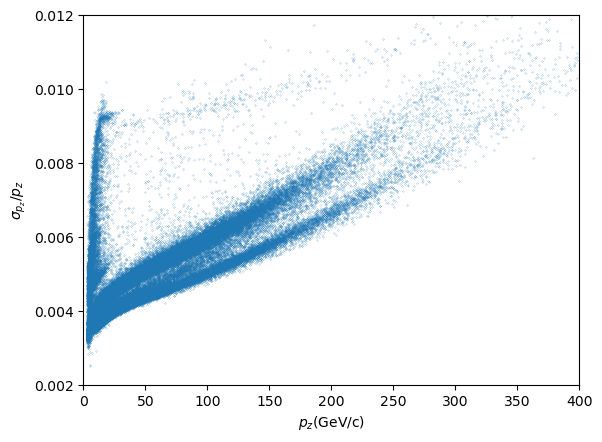

In [93]:
plt.scatter(x=muon_data_ext.pz,y=muon_data_ext.epz,marker=".",s=0.1)
plt.xlim([0,400])
plt.ylim([0.002,.012])
plt.ylabel("$\sigma_{p_z} / p_z$")
plt.xlabel("$p_z(\mathrm{GeV} / \mathrm{c})$")
plt.show()

This distribution is qualitatively the same as the scatter plot in ep and p above.

Therefore, this also shows that pt << pz.

## Exercise 3 (2 points)

In [146]:
data = muon_data_ext[["p", "tx", "ty", "eta", "phi"]].values

In [109]:
target = muon_data_ext["ep"].values

In [119]:
# num of inputs = 5 (p, tx, ty, eta, phi), num of outputs = 1 (ep)
num_inputs = 5; num_outputs = 1
# simple Keras model : use same # of nodes as # of inputs, single layer
num_nodes = num_inputs
def simple_model():
    # create model
    model = Sequential()
    # no activation required for the output, as this is a regression problem,
    # ie. we need a numerical prediction for any input
    model.add(Dense(num_nodes, input_dim=num_inputs, kernel_initializer="normal", activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(num_outputs, kernel_initializer="normal"))
    # Compile model
    model.compile(loss="mean_squared_error", optimizer="adam")
    return model

In [120]:
N_epochs = 100
batchSize = 1024
# must always set the random seed for reproducibility
Answer_to_all_questions = 42
np.random.seed(Answer_to_all_questions)
estimator = KerasRegressor(build_fn=simple_model, epochs=N_epochs, batch_size=batchSize, verbose=1)
kfold = KFold(n_splits=10, random_state=Answer_to_all_questions, shuffle=True)
# data and target are 5-column and 1-column arrays produced with pandas.DataFrame.values
results = cross_val_score(estimator, data, target, cv=kfold, scoring ="r2")

Epoch 1/100


/tmp/ipykernel_1475550/119642221.py:6: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasRegressor(build_fn=simple_model, epochs=N_epochs, batch_size=batchSize, verbose=1)


184/184 [==============================] - 1s 2ms/step - loss: 0.0030
Epoch 2/100
184/184 [==============================] - 0s 2ms/step - loss: 1.7639e-05
Epoch 3/100
184/184 [==============================] - 0s 2ms/step - loss: 3.2402e-06
Epoch 4/100
184/184 [==============================] - 0s 1ms/step - loss: 1.1560e-06
Epoch 5/100
184/184 [==============================] - 0s 1ms/step - loss: 6.3357e-07
Epoch 6/100
184/184 [==============================] - 0s 2ms/step - loss: 4.8289e-07
Epoch 7/100
184/184 [==============================] - 0s 2ms/step - loss: 4.4139e-07
Epoch 8/100
184/184 [==============================] - 0s 1ms/step - loss: 4.3069e-07
Epoch 9/100
184/184 [==============================] - 0s 1ms/step - loss: 4.2834e-07
Epoch 10/100
184/184 [==============================] - 0s 1ms/step - loss: 4.2957e-07
Epoch 11/100
184/184 [==============================] - 0s 1ms/step - loss: 4.2821e-07
Epoch 12/100
184/184 [==============================] - 0s 1ms/step 

In [122]:
print("Standardised : %.2f %s %.2f" % (results.mean() , u"\u00B1 ", results.std()))

Standardised : 0.66 ±  0.09


Loss function converges much quicker with a larger batch size

## Exercise 4 (3 points)

### a)

In [128]:
# Keeping same epochs, batch_size and random state as previous model

estimators = []
estimators.append(("standardize", StandardScaler()))
estimators.append(("mlp", KerasRegressor(build_fn=simple_model, epochs=N_epochs, batch_size=batchSize, verbose=1)))
pipeline = Pipeline(estimators)

/tmp/ipykernel_1475550/1223980787.py:5: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimators.append(("mlp", KerasRegressor(build_fn=simple_model, epochs=N_epochs, batch_size=batchSize, verbose=1)))


In [129]:
kfold = KFold(n_splits=10, random_state=Answer_to_all_questions, shuffle=True)
# data and target are 5-column and 1-column arrays produced with pandas.DataFrame.values
results2 = cross_val_score(pipeline, data, target, cv=kfold, scoring ="r2")

Epoch 1/100
184/184 [==============================] - 0s 1ms/step - loss: 5.2055e-06
Epoch 2/100
184/184 [==============================] - 0s 1ms/step - loss: 5.2354e-07
Epoch 3/100
184/184 [==============================] - 0s 1ms/step - loss: 4.6806e-07
Epoch 4/100
184/184 [==============================] - 0s 1ms/step - loss: 4.4136e-07
Epoch 5/100
184/184 [==============================] - 0s 1ms/step - loss: 4.3451e-07
Epoch 6/100
184/184 [==============================] - 0s 1ms/step - loss: 4.2718e-07
Epoch 7/100
184/184 [==============================] - 0s 2ms/step - loss: 4.1914e-07
Epoch 8/100
184/184 [==============================] - 0s 2ms/step - loss: 4.1291e-07
Epoch 9/100
184/184 [==============================] - 0s 1ms/step - loss: 4.1048e-07
Epoch 10/100
184/184 [==============================] - 0s 1ms/step - loss: 4.0635e-07
Epoch 11/100
184/184 [==============================] - 0s 1ms/step - loss: 4.0236e-07
Epoch 12/100
184/184 [==============================

In [130]:
print("Standardised : %.2f %s %.2f" % (results2.mean() , u"\u00B1 ", results2.std()))

Standardised : 0.71 ±  0.06


The model with the standardised inputs shows better performance and lower standard deviation

### b)

In [134]:
def denser_model():
    # create model
    model = Sequential()
    # no activation required for the output, as this is a regression problem,
    # ie. we need a numerical prediction for any input
    model.add(Dense(num_nodes, input_dim=num_inputs, kernel_initializer="normal", activation="relu"))
    model.add(Dropout(0.2))
    # Extra layer, 3 nodes, keep same dropout
    model.add(Dense(3, kernel_initializer="normal", activation="relu"))  
    model.add(Dropout(0.2))
    
    model.add(Dense(num_outputs, kernel_initializer="normal"))
    # Compile model
    model.compile(loss="mean_squared_error", optimizer="adam")
    return model

Running the exercise again with but with the denser model.

Will use the estimator with the standardised inputs from now on as it performs better.

In [136]:
# Keeping same epochs, batch_size and random state as previous model
# Updating the NN model
estimators = []
estimators.append(("standardize", StandardScaler()))
estimators.append(("mlp", KerasRegressor(build_fn=denser_model, epochs=N_epochs, batch_size=batchSize, verbose=1)))
pipeline = Pipeline(estimators)

/tmp/ipykernel_1475550/4146620519.py:5: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimators.append(("mlp", KerasRegressor(build_fn=denser_model, epochs=N_epochs, batch_size=batchSize, verbose=1)))


In [137]:
kfold = KFold(n_splits=10, random_state=Answer_to_all_questions, shuffle=True)
# data and target are 5-column and 1-column arrays produced with pandas.DataFrame.values
results3 = cross_val_score(pipeline, data, target, cv=kfold, scoring ="r2")

Epoch 1/100
184/184 [==============================] - 1s 2ms/step - loss: 1.1772e-06
Epoch 2/100
184/184 [==============================] - 0s 2ms/step - loss: 5.6633e-07
Epoch 3/100
184/184 [==============================] - 0s 2ms/step - loss: 4.9840e-07
Epoch 4/100
184/184 [==============================] - 0s 2ms/step - loss: 4.8895e-07
Epoch 5/100
184/184 [==============================] - 0s 2ms/step - loss: 4.8308e-07
Epoch 6/100
184/184 [==============================] - 0s 2ms/step - loss: 4.8034e-07
Epoch 7/100
184/184 [==============================] - 0s 2ms/step - loss: 4.5359e-07
Epoch 8/100
184/184 [==============================] - 0s 2ms/step - loss: 4.5181e-07
Epoch 9/100
184/184 [==============================] - 0s 2ms/step - loss: 4.5096e-07
Epoch 10/100
184/184 [==============================] - 0s 2ms/step - loss: 4.4750e-07
Epoch 11/100
184/184 [==============================] - 0s 2ms/step - loss: 4.5032e-07
Epoch 12/100
184/184 [==============================

In [138]:
print("Standardised : %.2f %s %.2f" % (results3.mean() , u"\u00B1 ", results3.std()))

Standardised : 0.64 ±  0.07


### c)

In [139]:
def wider_model():
    # create model
    model = Sequential()
    # no activation required for the output, as this is a regression problem,
    # ie. we need a numerical prediction for any input
    
    # Doubling num_nodes compared to simple_model
    model.add(Dense(2*num_nodes, input_dim=num_inputs, kernel_initializer="normal", activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(num_outputs, kernel_initializer="normal"))
    # Compile model
    model.compile(loss="mean_squared_error", optimizer="adam")
    return model

In [140]:
# Keeping same epochs, batch_size and random state as previous model
# Updating the NN model
estimators = []
estimators.append(("standardize", StandardScaler()))
estimators.append(("mlp", KerasRegressor(build_fn=wider_model, epochs=N_epochs, batch_size=batchSize, verbose=1)))
pipeline = Pipeline(estimators)

/tmp/ipykernel_1475550/585491230.py:5: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimators.append(("mlp", KerasRegressor(build_fn=wider_model, epochs=N_epochs, batch_size=batchSize, verbose=1)))


In [141]:
kfold = KFold(n_splits=10, random_state=Answer_to_all_questions, shuffle=True)
# data and target are 5-column and 1-column arrays produced with pandas.DataFrame.values
results4 = cross_val_score(pipeline, data, target, cv=kfold, scoring ="r2")

Epoch 1/100
184/184 [==============================] - 0s 2ms/step - loss: 4.4448e-05
Epoch 2/100
184/184 [==============================] - 0s 2ms/step - loss: 1.5805e-06
Epoch 3/100
184/184 [==============================] - 0s 2ms/step - loss: 6.5008e-07
Epoch 4/100
184/184 [==============================] - 0s 2ms/step - loss: 5.3994e-07
Epoch 5/100
184/184 [==============================] - 0s 2ms/step - loss: 5.0643e-07
Epoch 6/100
184/184 [==============================] - 0s 2ms/step - loss: 4.8449e-07
Epoch 7/100
184/184 [==============================] - 0s 2ms/step - loss: 4.6963e-07
Epoch 8/100
184/184 [==============================] - 0s 2ms/step - loss: 4.5205e-07
Epoch 9/100
184/184 [==============================] - 0s 2ms/step - loss: 4.4491e-07
Epoch 10/100
184/184 [==============================] - 0s 2ms/step - loss: 4.3705e-07
Epoch 11/100
184/184 [==============================] - 0s 2ms/step - loss: 4.2394e-07
Epoch 12/100
184/184 [==============================

In [142]:
print("Standardised : %.2f %s %.2f" % (results4.mean() , u"\u00B1 ", results4.std()))

Standardised : 0.74 ±  0.02


Out of the three architectures tried above(ie: simple_model, denser_model, wider_model), with the same standardised input features, the model that has the best performance (highest avg. $R^2$ value) is: 

<b>The wider_model </b>

This model has an avg. $R^2$ value of 0.74 ±  0.02

This is the highest avg. $R^2$ value of the three models

## Exercise 5 (3 points)

### a)

Approach: Increase input features, keep single layer, increase nodes, reduce dropout rate

In [173]:
# Increase input features
data = muon_data_ext[["p", "tx", "ty", "eta", "phi","pt","qp","zV"]].values

In [201]:
num_inputs = 8; num_outputs = 1
num_nodes = num_inputs
def best_model():
    # create model
    model = Sequential()
    # no activation required for the output, as this is a regression problem,
    # ie. we need a numerical prediction for any input
    
    # Increasing num_nodes compared to num_inputs
    model.add(Dense(15*num_nodes, input_dim=num_inputs, kernel_initializer="normal", activation="relu"))
    model.add(Dropout(0.1))

    model.add(Dense(num_outputs, kernel_initializer="normal"))
    # Compile model
    model.compile(loss="mean_squared_error", optimizer="adam")
    return model

In [202]:
# Keeping same epochs, batch_size and random state as previous model
# Updating the NN model
estimators = []
estimators.append(("standardize", StandardScaler()))
estimators.append(("mlp", KerasRegressor(build_fn=best_model, epochs=N_epochs, batch_size=batchSize, verbose=1)))
pipeline = Pipeline(estimators)

/tmp/ipykernel_1475550/86824288.py:5: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimators.append(("mlp", KerasRegressor(build_fn=best_model, epochs=N_epochs, batch_size=batchSize, verbose=1)))


In [203]:
kfold = KFold(n_splits=10, random_state=Answer_to_all_questions, shuffle=True)
best_results = cross_val_score(pipeline, data, target, cv=kfold, scoring ="r2")

Epoch 1/100
184/184 [==============================] - 1s 3ms/step - loss: 2.3450e-04
Epoch 2/100
184/184 [==============================] - 1s 3ms/step - loss: 2.8084e-05
Epoch 3/100
184/184 [==============================] - 1s 3ms/step - loss: 8.0830e-06
Epoch 4/100
184/184 [==============================] - 1s 3ms/step - loss: 3.2759e-06
Epoch 5/100
184/184 [==============================] - 1s 3ms/step - loss: 1.6182e-06
Epoch 6/100
184/184 [==============================] - 1s 3ms/step - loss: 9.7616e-07
Epoch 7/100
184/184 [==============================] - 1s 3ms/step - loss: 6.5863e-07
Epoch 8/100
184/184 [==============================] - 1s 3ms/step - loss: 5.0250e-07
Epoch 9/100
184/184 [==============================] - 1s 3ms/step - loss: 4.1458e-07
Epoch 10/100
184/184 [==============================] - 1s 3ms/step - loss: 3.6343e-07
Epoch 11/100
184/184 [==============================] - 1s 3ms/step - loss: 3.3697e-07
Epoch 12/100
184/184 [==============================

In [204]:
print("Standardised : %.2f %s %.2f" % (best_results.mean() , u"\u00B1 ", best_results.std()))

Standardised : 0.82 ±  0.01


This NN architecture has achieved the highest avg. $R^2$ value of <b>0.82 ±  0.01</b>

### b)

In [205]:
predicted = cross_val_predict(pipeline, data, target, cv=kfold)

Epoch 1/100
184/184 [==============================] - 1s 3ms/step - loss: 2.1251e-04
Epoch 2/100
184/184 [==============================] - 1s 4ms/step - loss: 2.2873e-05
Epoch 3/100
184/184 [==============================] - 1s 3ms/step - loss: 6.7069e-06
Epoch 4/100
184/184 [==============================] - 1s 3ms/step - loss: 2.7772e-06
Epoch 5/100
184/184 [==============================] - 1s 4ms/step - loss: 1.4560e-06
Epoch 6/100
184/184 [==============================] - 1s 3ms/step - loss: 9.2181e-07
Epoch 7/100
184/184 [==============================] - 1s 3ms/step - loss: 6.4793e-07
Epoch 8/100
184/184 [==============================] - 1s 4ms/step - loss: 4.9133e-07
Epoch 9/100
184/184 [==============================] - 1s 3ms/step - loss: 4.0321e-07
Epoch 10/100
184/184 [==============================] - 1s 4ms/step - loss: 3.5607e-07
Epoch 11/100
184/184 [==============================] - 1s 3ms/step - loss: 3.2047e-07
Epoch 12/100
184/184 [==============================

### Then, create a $(\sigma_{p}/p)_{true}$-vs-$(\sigma_{p}/p)_{pred}$ scatter plot and overlay a $y = x$ diagonal line to see how well you have done.

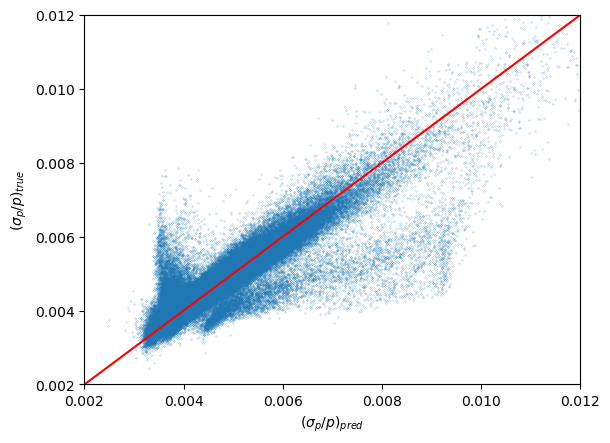

In [206]:
plt.scatter(x=muon_data_ext.ep,y=predicted,marker=".",s=0.1)
plt.xlim([0.002,.012])
plt.ylim([0.002,.012])
plt.plot([0.002,.012], [0.002, 0.012],color ="red")
plt.ylabel("$(\sigma_{p} / p)_{true}$")
plt.xlabel("$(\sigma_{p} / p)_{pred}$")
plt.show()

True and predicted lie close to a straight line with little spread.

Shows that the regression has been quite successful in predicting the momentum resolution based on the input features.

However, there are a subset of events which stand out in a lower band from the central band. These events likely have more unusual features and are harder to correctly predict.

### Finally, reproduce the scatter plot of Fig. 1 by using the predicted values for the relative muon resolution, $(\sigma_{p}/p)_{pred}$.

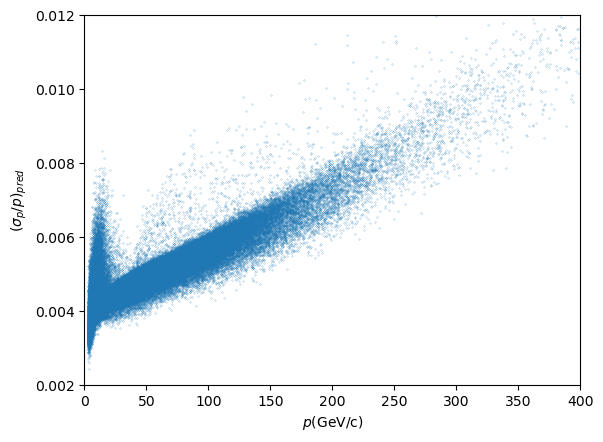

In [207]:
plt.scatter(x=momentum,y=predicted,marker=".",s=0.1)
plt.xlim([0,400])
plt.ylim([0.002,.012])
plt.ylabel("$(\sigma_{p} / p)_{pred}$")
plt.xlabel("$p(\mathrm{GeV} / \mathrm{c})$")
plt.show()

This plot shows that the original distribution has almost been completely reproduced.

The central and vertical bands can be clearly seen.

However, the central bands have lost resolution and have merged into a single band. Futhermore, the vertical band does not extend as far as in the original distribution. This is mainly due to the regression performance and how well the NN can predict the original distribution based on the input features. 